In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re


# Part 1: EDA - Analysis

There is roughly the same amount of articles in each category, so that is good for the data quality. 

Tech has the highest word count, followed by politics, then business, entertainment, and sport are last place. We could guess that tech and politics has the most substance to the words, while entertainment and sport articles are just quick and non-serious articles.

### Data cleaning
The data cleaning steps are: 
1. Remove punctuation
2. Replace multiple whitespaces with only one
3. Remove URLs
4. Lower case the text
5. Split the words to add them to an array
6. Loop through the array of words, returning only non-stop words while also lemmatizing the words


The goal of the data cleaning is to normalize the text, remove extra and used text to ensure we are concise, exclude stop words that are defined by the NLTK library, and lemmatize the words to have them in consistent form.

After cleaning the words, it is interesting that the distribution of words remains the same.

### Wordcloud: 

Next, we generated a wordcloud for each categories. One interesting aspect is that each had "said" as one of the most frequent words, so we can add that word to the stop words since it does not help us categorize the text.


count      1490
unique        5
top       sport
freq        346
Name: Category, dtype: object


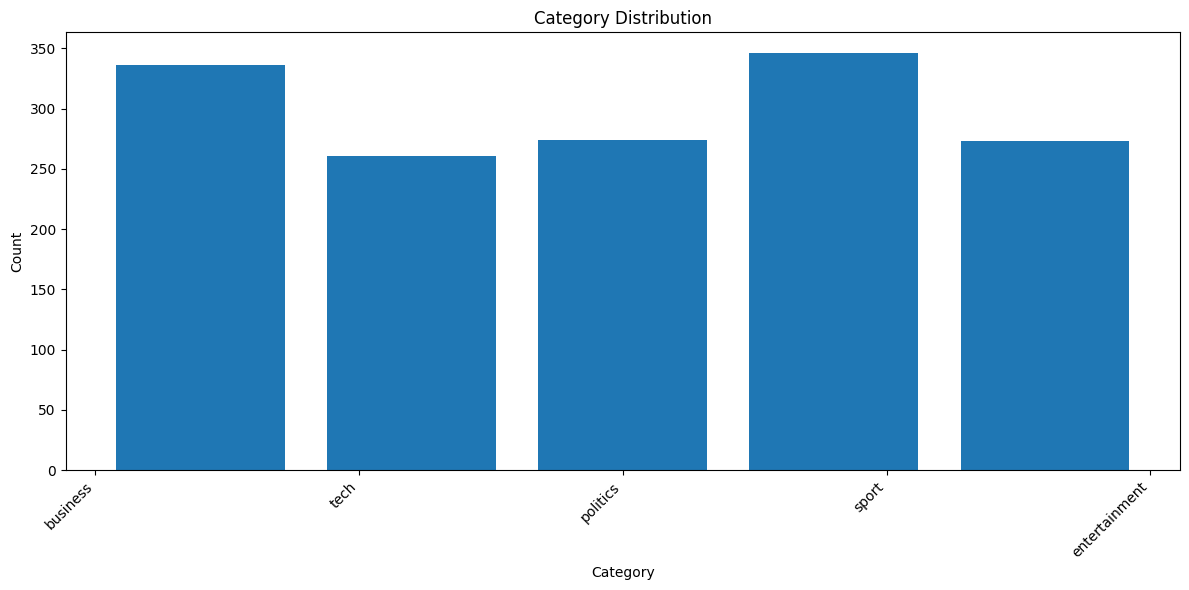

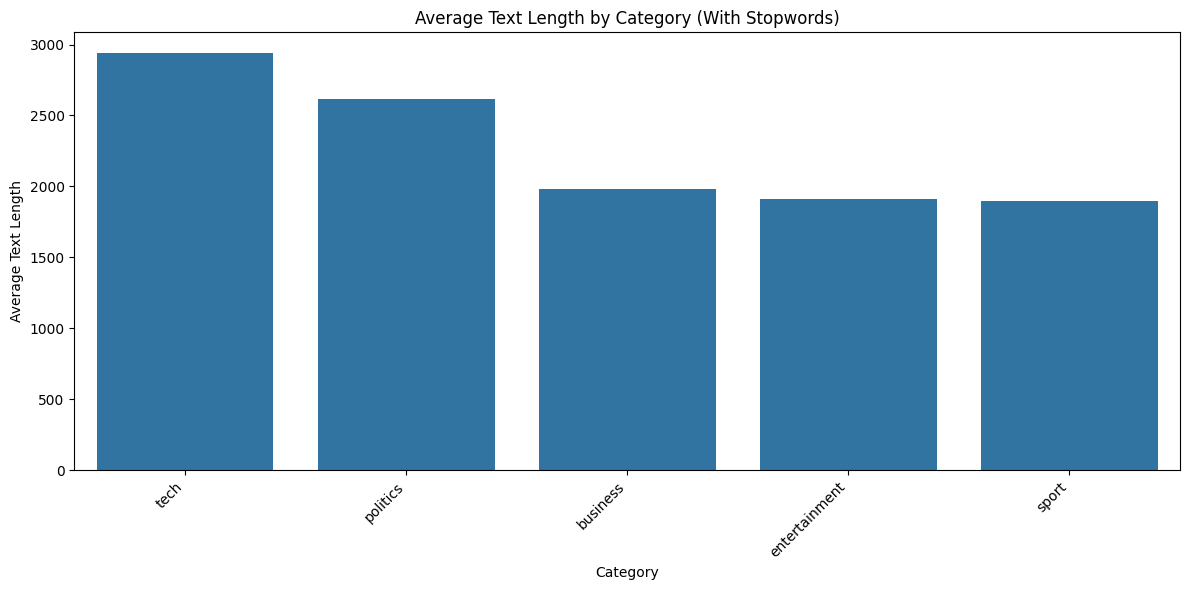

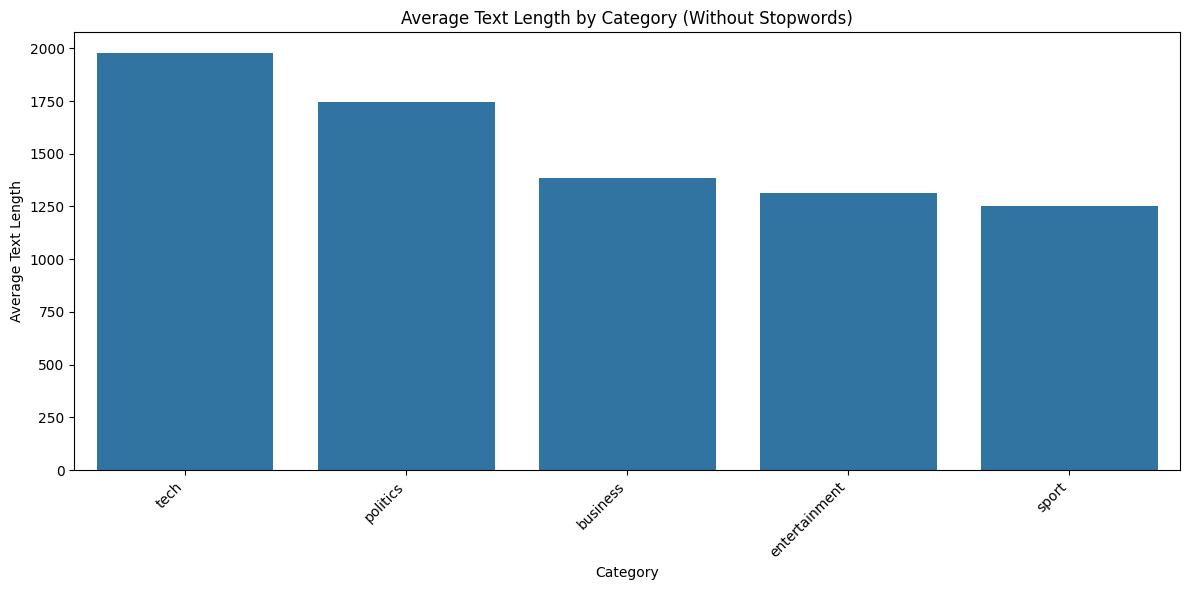

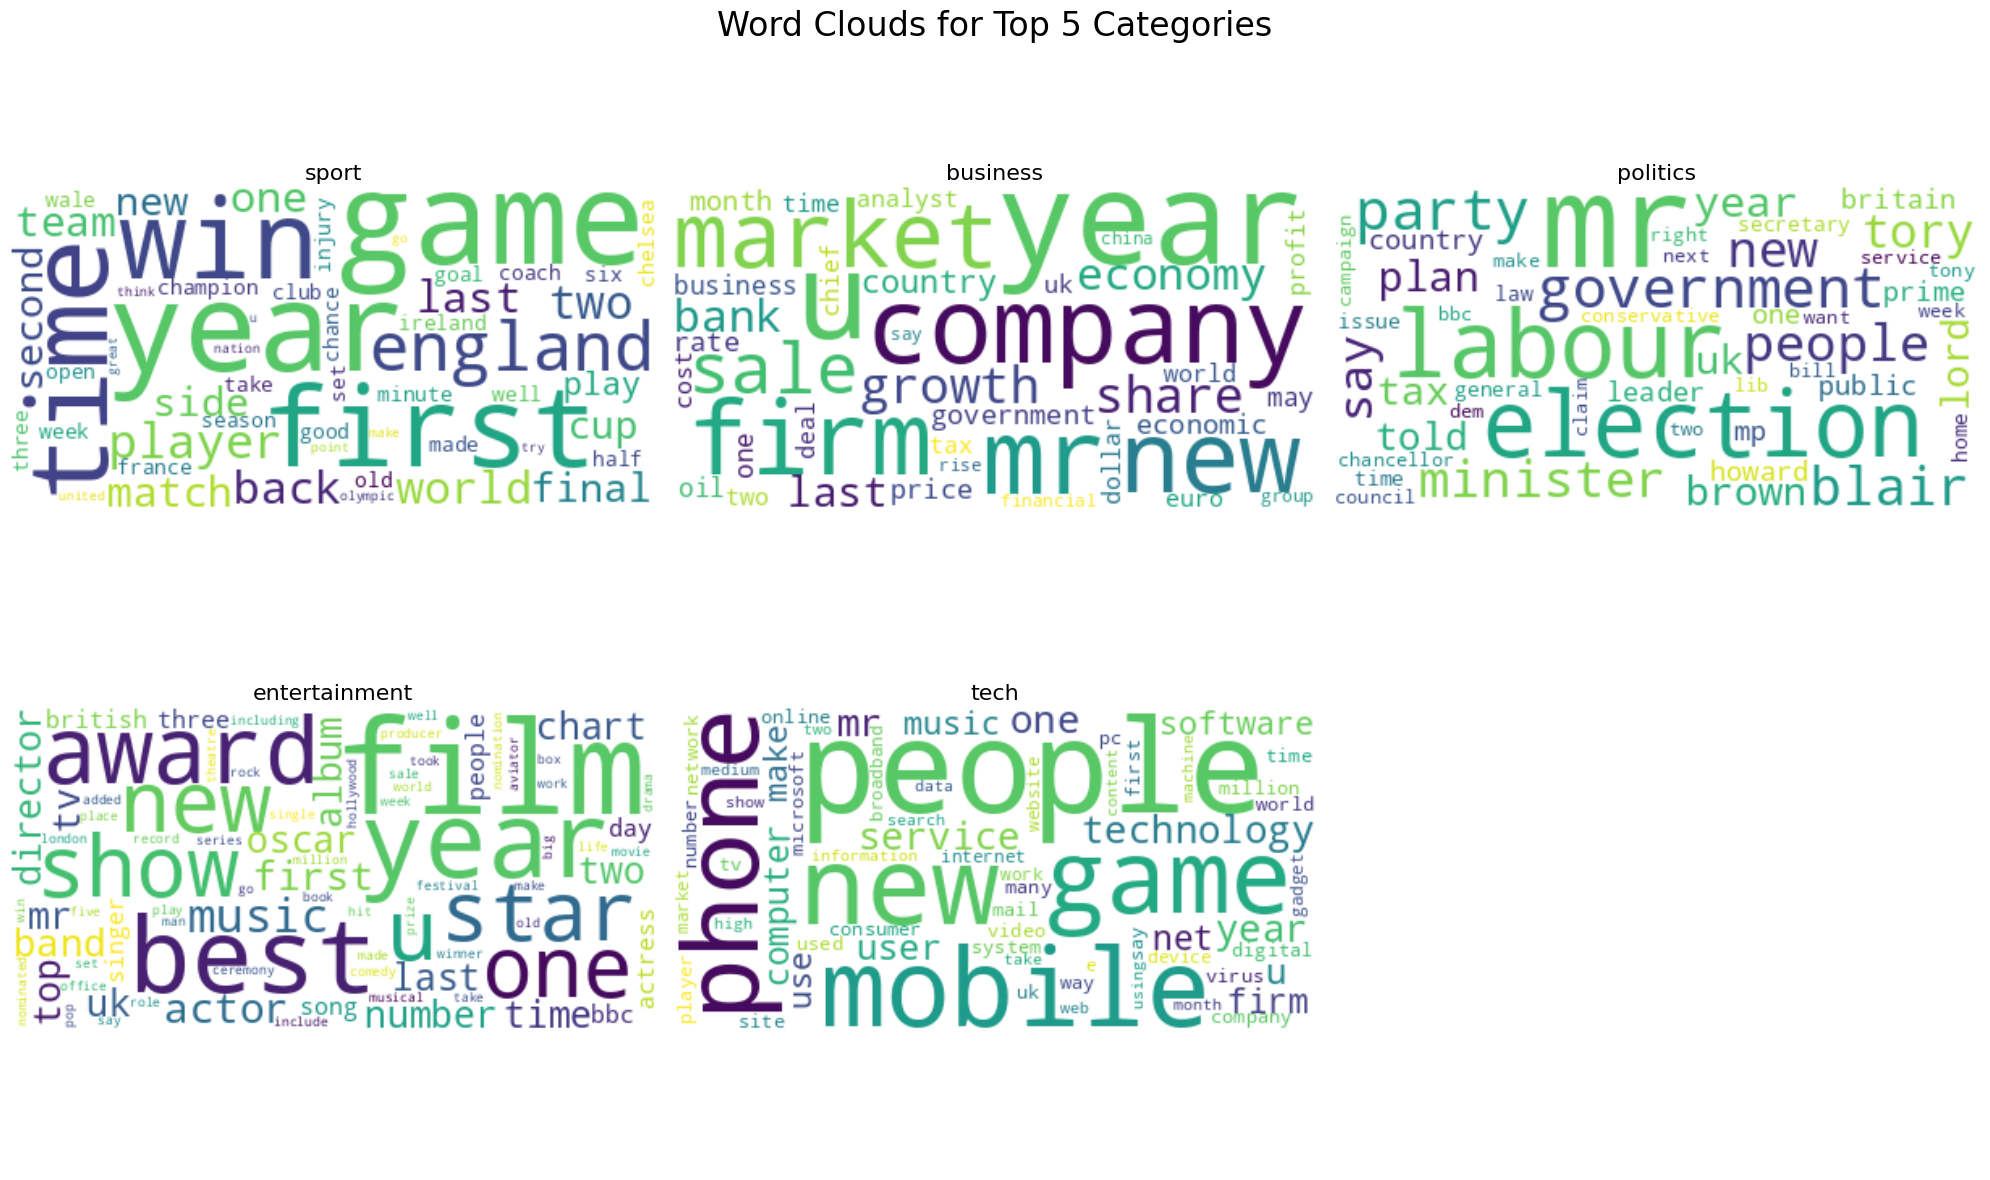

In [30]:
# Part 1: EDA - code

train_data = pd.read_csv('train.csv')  
test_data = pd.read_csv('test.csv')  

print(train_data['Category'].describe())

# Histogram of category distribution
category_counts = train_data['Category'].value_counts()
plt.figure(figsize=(12, 6))
plt.hist(train_data['Category'], bins=len(category_counts), align='mid', rwidth=0.8)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
stop_words.add('said') # we figured out this is the most common word for each category, so removing it will help produce better results
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  
    text = re.sub(r'\s+', ' ', text)  
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  
    text = text.lower()  
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)


avg_text_length_with_stopwords = train_data.groupby('Category')['Text'].apply(lambda x: x.str.len().mean()).sort_values(ascending=False)
train_data['cleaned_text'] = train_data['Text'].apply(clean_text)
avg_text_length_without_stopwords = train_data.groupby('Category')['cleaned_text'].apply(lambda x: x.str.len().mean()).sort_values(ascending=False)

# Histogram of avg text length with stop words
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_text_length_with_stopwords.index, y=avg_text_length_with_stopwords.values)
plt.title('Average Text Length by Category (With Stopwords)')
plt.xlabel('Category')
plt.ylabel('Average Text Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Histogram of avg text length with stop words
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_text_length_without_stopwords.index, y=avg_text_length_without_stopwords.values)
plt.title('Average Text Length by Category (Without Stopwords)')
plt.xlabel('Category')
plt.ylabel('Average Text Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Create a word cloud for each category
top_5_categories = train_data['Category'].value_counts().nlargest(5).index
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle("Word Clouds for Top 5 Categories", fontsize=24)
for i, category in enumerate(top_5_categories):
    category_text = ' '.join(train_data[train_data['Category'] == category]['cleaned_text'])
    wordcloud = WordCloud(
        width=400, 
        height=200,
        background_color='white',
        max_words=100,
        max_font_size=80,
        min_font_size=8,
        random_state=42,
        collocations=False
    ).generate(category_text)
    
    ax = axes[i // 3, i % 3]
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(category, fontsize=16)
    ax.axis("off")

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()



# References

### NLP

The references for learning about NLP are here - this is where I learned about stop words and lemmentization:
* https://www.nltk.org/search.html?q=stopwords
* https://pythonspot.com/nltk-stop-words/
* https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
